<a href="https://colab.research.google.com/github/iamlekh/MNIST_dataset/blob/master/Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## MNIST Digit Classification

# dependencies

In [1]:
%tensorflow_version 2.x
import tensorflow as tf 
!pip install mitdeeplearning
import mitdeeplearning as mdl
import matplotlib.pyplot as plt
import numpy as np
import random
from tqdm import tqdm
assert len(tf.config.list_physical_devices('GPU')) > 0

     |████████████████████████████████| 2.1MB 4.5MB/s 
  Created wheel for mitdeeplearning: filename=mitdeeplearning-0.1.2-cp36-none-any.whl size=2114586 sha256=5edaf2e2054281583e1c4dd08cb54d885a94d2288229e11aebaff1813b21c36c
  Stored in directory: /root/.cache/pip/wheels/27/e1/73/5f01c787621d8a3c857f59876c79e304b9b64db9ff5bd61b74
Successfully built mitdeeplearning


## *MNIST dataset*

In [2]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = (np.expand_dims(train_images, axis=-1)/255.).astype(np.float32)
train_labels = (train_labels).astype(np.int64)
test_images = (np.expand_dims(test_images, axis=-1)/255.).astype(np.float32)
test_labels = (test_labels).astype(np.int64)

11493376/11490434 [==============================] - 0s 0us/step


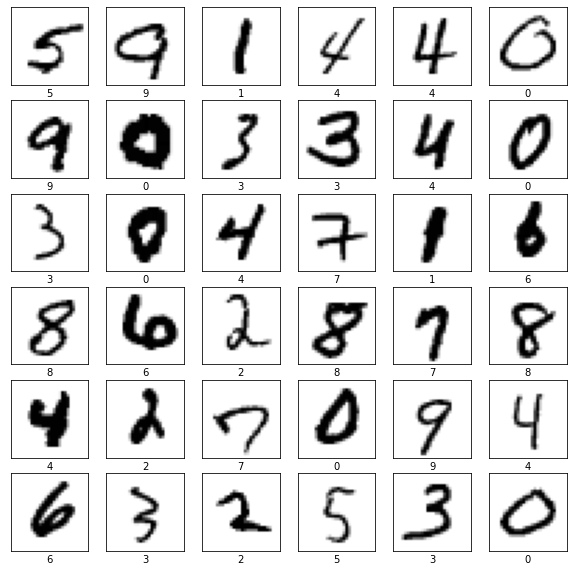

In [3]:
plt.figure(figsize=(10,10))
random_inds = np.random.choice(60000,36)
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image_ind = random_inds[i]
    plt.imshow(np.squeeze(train_images[image_ind]), cmap=plt.cm.binary)
    plt.xlabel(train_labels[image_ind])

## *Neural Network for Handwritten Digit Classification*

In [4]:
def build_fc_model():
  fc_model = tf.keras.Sequential([
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128, activation=tf.nn.relu),
      tf.keras.layers.Dense(10, activation=tf.nn.softmax) 
  ])
  return fc_model

model = build_fc_model()

## *Compile the model*

In [5]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-1), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## *Train the model*

In [6]:
BATCH_SIZE = 64
EPOCHS = 10

model.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS)

Epoch 1/10
938/938 [==============================] - 2s 2ms/step - loss: 0.3726 - accuracy: 0.8978
Epoch 2/10
938/938 [==============================] - 2s 2ms/step - loss: 0.2006 - accuracy: 0.9428
Epoch 3/10
938/938 [==============================] - 2s 2ms/step - loss: 0.1508 - accuracy: 0.9572
Epoch 4/10
938/938 [==============================] - 2s 2ms/step - loss: 0.1220 - accuracy: 0.9651
Epoch 5/10
938/938 [==============================] - 2s 2ms/step - loss: 0.1023 - accuracy: 0.9710
Epoch 6/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0880 - accuracy: 0.9754
Epoch 7/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0767 - accuracy: 0.9789
Epoch 8/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0683 - accuracy: 0.9809
Epoch 9/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0614 - accuracy: 0.9828
Epoch 10/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0554 - accuracy: 0.9849

## *Evaluate accuracy on the test dataset*

In [7]:
'''TODO: Use the evaluate method to test the model!'''
test_loss, test_acc = model.evaluate(test_images,test_labels)

print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0799 - accuracy: 0.9769
Test accuracy: 0.9768999814987183


## *Convolutional Neural Network (CNN) for handwritten digit classification*

## *Define the CNN model*

In [8]:
def build_cnn_model():
    cnn_model= tf.keras.Sequential([
                                    tf.keras.layers.Conv2D(32, (5, 5), input_shape=(28,28,1), activation= 'relu' ),
                                    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
                                    tf.keras.layers.Conv2D(64, (5, 5), activation= 'relu' ),
                                    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
                                    tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation= 'relu' ),
                                    tf.keras.layers.Dense(10, activation= 'softmax' )
    ])
  
    
    return cnn_model
  
cnn_model = build_cnn_model()
cnn_model.predict(train_images[[0]])
print(cnn_model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 64)          51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)              

## *Train and test the CNN model*

In [9]:
# cnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), 
#               loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn_model.compile(loss= 'sparse_categorical_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ])

In [10]:
cnn_model.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS)

Epoch 1/10
938/938 [==============================] - 3s 3ms/step - loss: 0.1566 - accuracy: 0.9514
Epoch 2/10
938/938 [==============================] - 2s 3ms/step - loss: 0.0466 - accuracy: 0.9858
Epoch 3/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0337 - accuracy: 0.9895
Epoch 4/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0263 - accuracy: 0.9916
Epoch 5/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0229 - accuracy: 0.9926
Epoch 6/10
938/938 [==============================] - 2s 3ms/step - loss: 0.0188 - accuracy: 0.9940
Epoch 7/10
938/938 [==============================] - 2s 3ms/step - loss: 0.0157 - accuracy: 0.9951
Epoch 8/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0136 - accuracy: 0.9954
Epoch 9/10
938/938 [==============================] - 2s 3ms/step - loss: 0.0123 - accuracy: 0.9959
Epoch 10/10
938/938 [==============================] - 2s 3ms/step - loss: 0.0122 - accuracy: 0.9962

In [11]:
test_loss, test_acc = cnn_model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0263 - accuracy: 0.9929
Test accuracy: 0.992900013923645


## *Make predictions with the CNN model*

In [12]:
predictions = cnn_model.predict(test_images)

In [13]:
predictions[0]

array([5.3849425e-12, 1.3741500e-10, 2.3256939e-08, 9.3462695e-08,
       8.1181428e-10, 1.9193336e-10, 6.1327828e-14, 9.9999988e-01,
       1.2015688e-11, 4.0723864e-09], dtype=float32)

In [14]:
prediction = np.argmax(predictions[0]) 

print(prediction)

7


Label of this digit is: 7


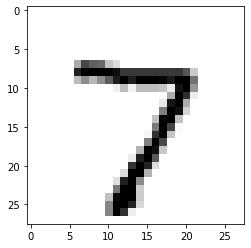

In [15]:
print("Label of this digit is:", test_labels[0])
plt.imshow(test_images[0,:,:,0], cmap=plt.cm.binary)

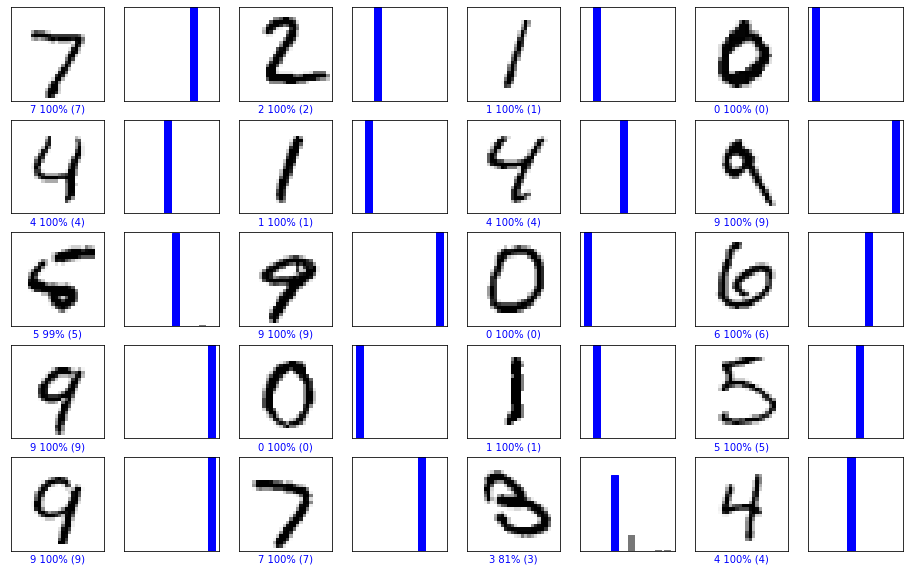

In [17]:
num_rows = 5
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  mdl.lab2.plot_image_prediction(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  mdl.lab2.plot_value_prediction(i, predictions, test_labels)